importing Jupyter notebook from titanic_eda.ipynb
(891, 12)
Age {'Filled': True, 'Type': 'Median', 'Fill_Value': 28.0, 'Null_Percentage': 0.199}
Cabin {'Filled': False, 'Dropped': True, 'Null_Percentage': 0.771}
Embarked {'Filled': True, 'Type': 'Mode', 'Fill_Value': 'S', 'Null_Percentage': 0.002}
(891, 14)


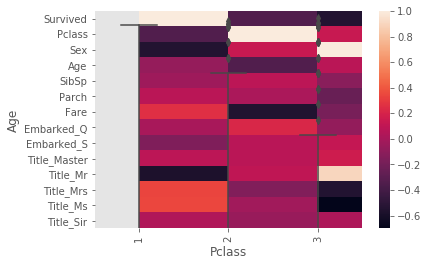

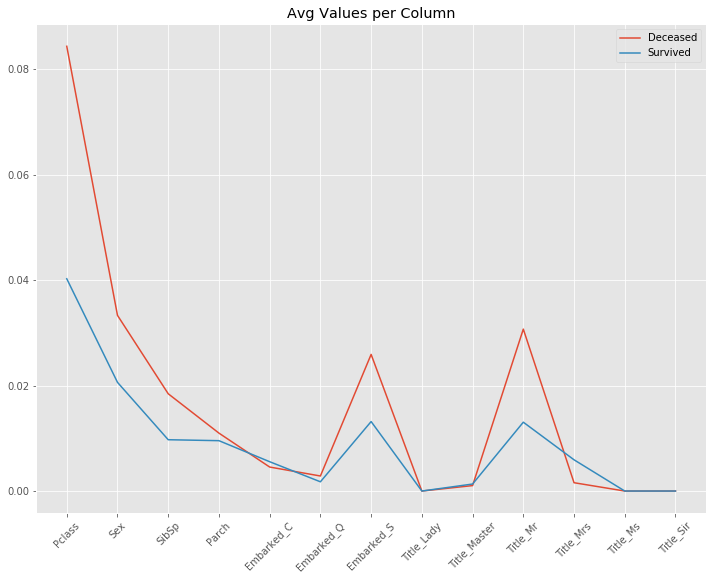

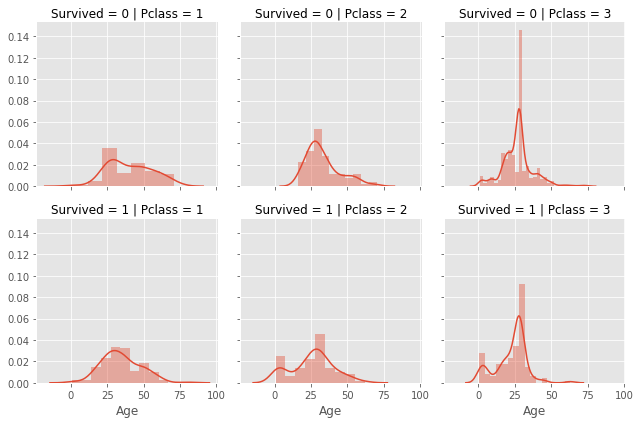

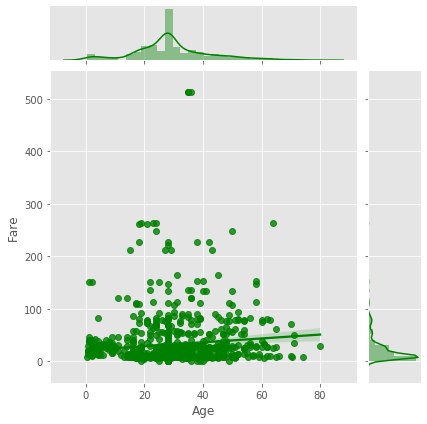

In [1]:
import import_ipynb
from titanic_eda import clean_data

## Predicting Survival Rate
***

In [2]:
import numpy as np 
import pandas as pd

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
df = pd.read_csv('data/titanic_clean.csv')

In [5]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Sir
0,0,3,1,22.0,1,0,7.2500,0,1,0,1,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,0,1,0,0,1,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1,0,1,0,0,0
887,1,1,0,19.0,0,0,30.0000,0,1,0,0,0,1,0
888,0,3,0,28.0,1,2,23.4500,0,1,0,0,0,1,0
889,1,1,1,26.0,0,0,30.0000,0,0,0,1,0,0,0


In [6]:
scaler = MinMaxScaler()

In [7]:
X = df.drop(columns='Survived')
y = df['Survived']

In [8]:
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [10]:
# Use GridSearch to iterate through a couple of models and their hyperparameters
model_list = {'LogisticRegression': LogisticRegression(), 
              'GradientBoostingClassifier': GradientBoostingClassifier()}

In [11]:
parameters = {'LogisticRegression': {'n_jobs':[-1], 
                                     'max_iter':[200,250,300,350], 
                                     'warm_start':[True], 
                                     'solver':['newton-cg','lbfgs'],
                                     'class_weight':[None], 
                                     'fit_intercept':[True,False]}, 
              'GradientBoostingClassifier': {'n_estimators':[200,250,300,350,400,450,500],
                                             'learning_rate':[1,.1,.05,.5,1.25,1.5],
                                             'criterion':['friedman_mse','mse','mae'],
                                             'min_samples_split':[2,3,5]}}

In [12]:
def gridsearch_models(models, parameters):
    result = {'Models':[], 'Scores':[], 'Parameters':[]}

    for model_name, model in models.items():
        clf = GridSearchCV(model, parameters[model_name])
        clf.fit(X_train, y_train)
        result['Models'].append(model_name)
        result['Scores'].append(clf.best_score_)
        result['Parameters'].append(clf.best_params_)

    return result

In [13]:
# first_model_test = gridsearch_models(model_list, parameters)

In [14]:
# first_model_test['Parameters'][0] # tried no scaling, standardscaler, and minmaxscaler - minmax worked best

In [15]:
# second_model_test = gridsearch_models(model_list, parameters)

In [16]:
# second_model_test

In [17]:
# gdb_model = GradientBoostingClassifier(criterion= 'mae',
#                                        learning_rate= 1,
#                                        min_samples_split= 2,
#                                        n_estimators= 350, max_features='auto')

In [18]:
logres_model = LogisticRegression(class_weight= None,
   fit_intercept= True,
   max_iter= 250,
   n_jobs= -1,
   solver= 'lbfgs',
   warm_start=True)

In [19]:
# test = gdb_model.fit(X_train, y_train)

In [20]:
testylog = logres_model.fit(X_train, y_train)
testylog.score(X_test, y_test)

0.8699551569506726

In [21]:
# test.score(X_test, y_test)

In [22]:
# test.score(X_test, y_test)

In [23]:
# params = dict(criterion= ['mae'],learning_rate= [1],min_samples_split= [2],n_estimators= [350], max_features=['auto', 'sqrt', 'log2'])

In [24]:
# params

In [25]:
# clf = GridSearchCV(GradientBoostingClassifier(), params)
# clf.fit(X_train, y_train)

In [26]:
# clf.best_params_

In [27]:
# clf.best_score_

In [28]:
testcsv = pd.read_csv('data/test.csv')

In [29]:
nulls, pleasework = clean_data(testcsv)

In [30]:
nulls

{'Age': {'Filled': True,
  'Type': 'Median',
  'Fill_Value': 27.0,
  'Null_Percentage': 0.206},
 'Fare': {'Filled': True,
  'Type': 'Median',
  'Fill_Value': 14.4542,
  'Null_Percentage': 0.002},
 'Cabin': {'Filled': False, 'Dropped': True, 'Null_Percentage': 0.782}}

In [38]:
predictions = testylog.predict(pleasework)

In [32]:
pleasework

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Ms
0,3,1,34.5,0,0,7.8292,1,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,1,0,1,0
2,2,1,62.0,0,0,9.6875,1,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,1,1,0,0
4,3,0,22.0,1,1,12.2875,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0,1,1,0,0
414,1,0,39.0,0,0,108.9000,0,0,0,0,1
415,3,1,38.5,0,0,7.2500,0,1,1,0,0
416,3,1,27.0,0,0,8.0500,0,1,1,0,0


In [33]:
helpme = [0]*418

In [34]:
len(helpme)

418

In [35]:
pleasework['Title_Master'] = helpme
pleasework['Title_Sir'] = helpme

In [36]:
pleasework

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Ms,Title_Master,Title_Sir
0,3,1,34.5,0,0,7.8292,1,0,1,0,0,0,0
1,3,0,47.0,1,0,7.0000,0,1,0,1,0,0,0
2,2,1,62.0,0,0,9.6875,1,0,1,0,0,0,0
3,3,1,27.0,0,0,8.6625,0,1,1,0,0,0,0
4,3,0,22.0,1,1,12.2875,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0,1,1,0,0,0,0
414,1,0,39.0,0,0,108.9000,0,0,0,0,1,0,0
415,3,1,38.5,0,0,7.2500,0,1,1,0,0,0,0
416,3,1,27.0,0,0,8.0500,0,1,1,0,0,0,0


In [39]:
pleasework['Survived'] = predictions

In [42]:
finals = pd.concat([testcsv['PassengerId'], pleasework['Survived']], axis=1)

In [46]:
finals.to_csv('data/first_submission.csv', index=False)

In [45]:
testcsv

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,S
